oct num starts  1

Real SIZE



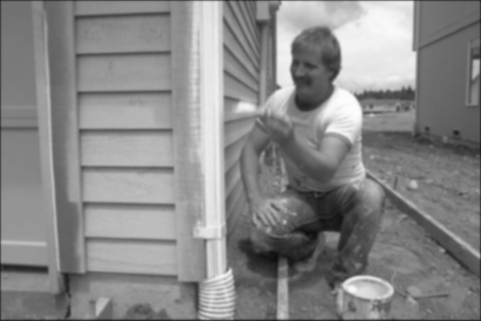


zoomed size



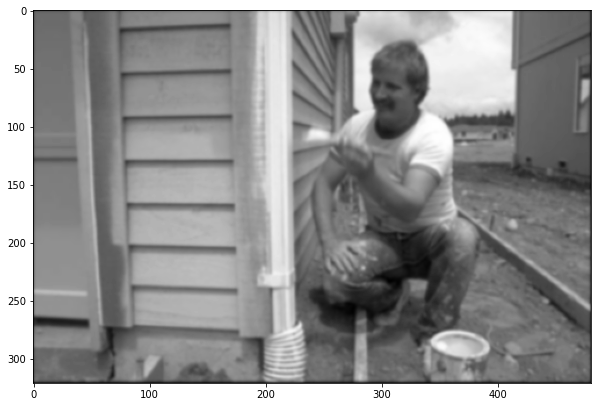


Real SIZE



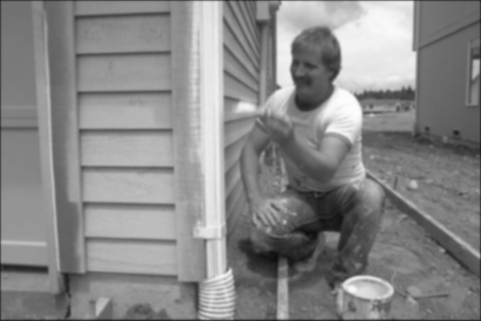


zoomed size



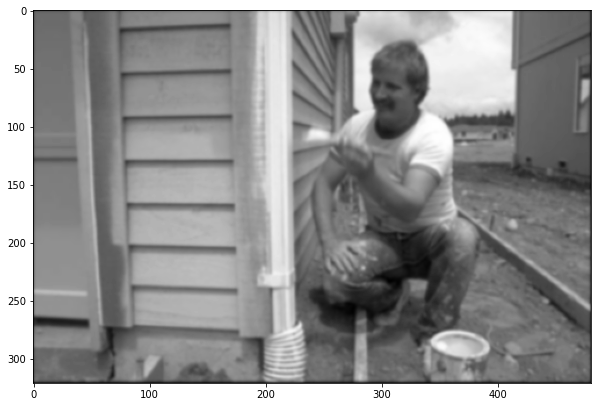


Real SIZE



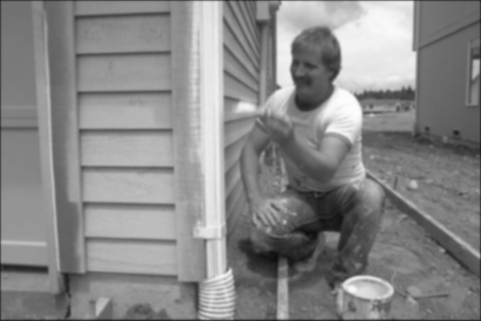


zoomed size



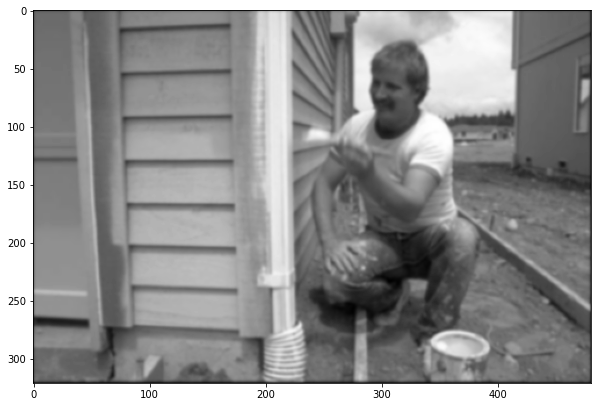


Real SIZE



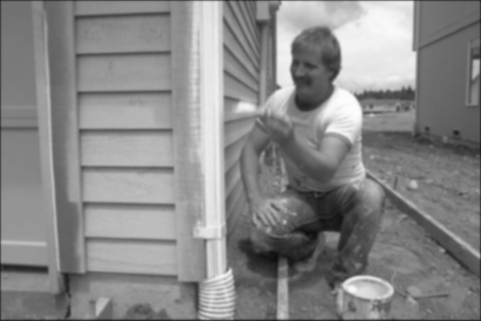


zoomed size



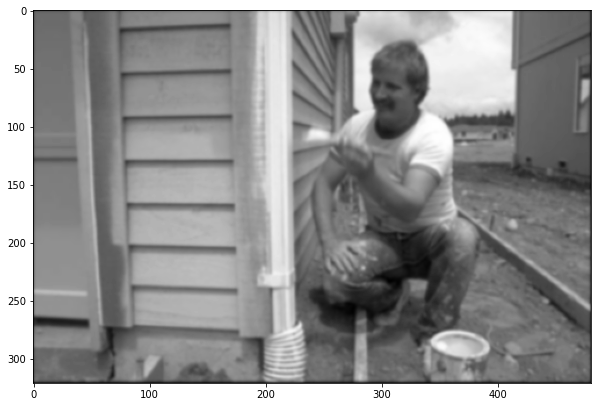


Real SIZE



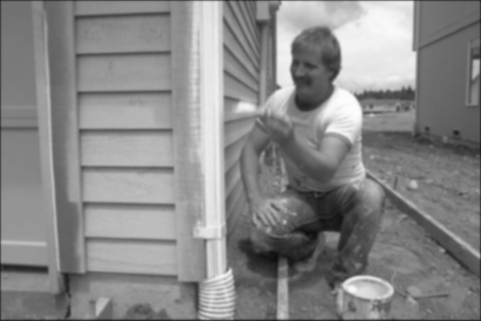


zoomed size



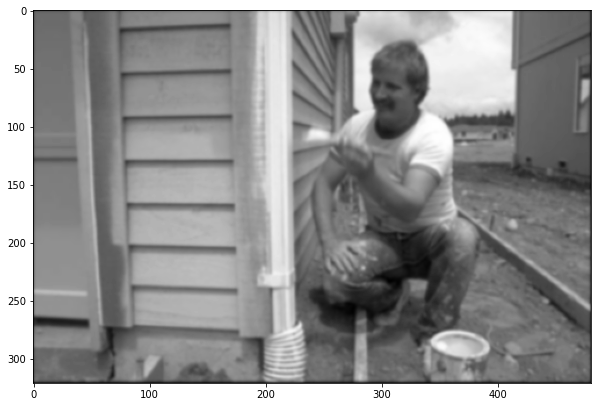


Real SIZE



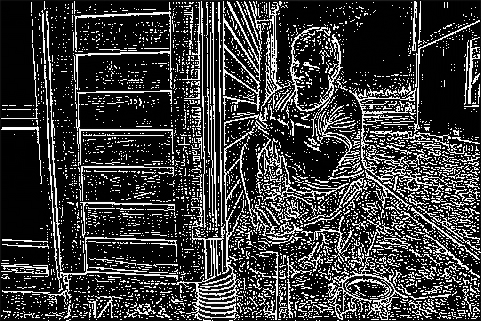


zoomed size



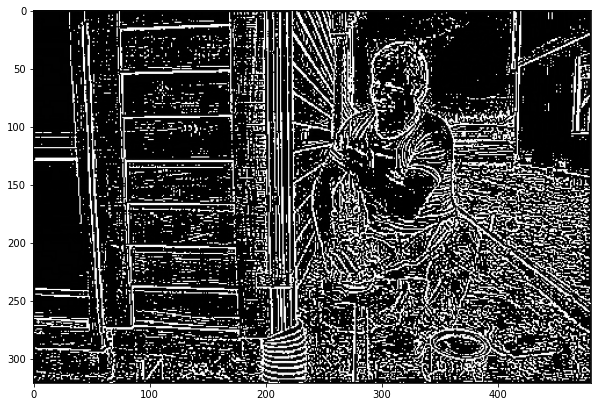


Real SIZE



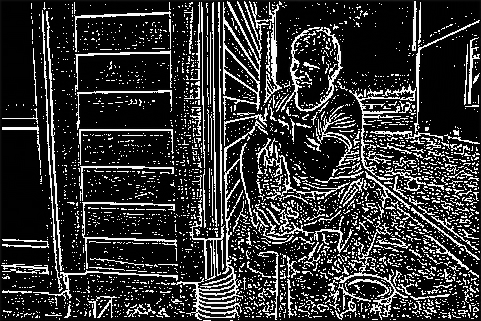


zoomed size



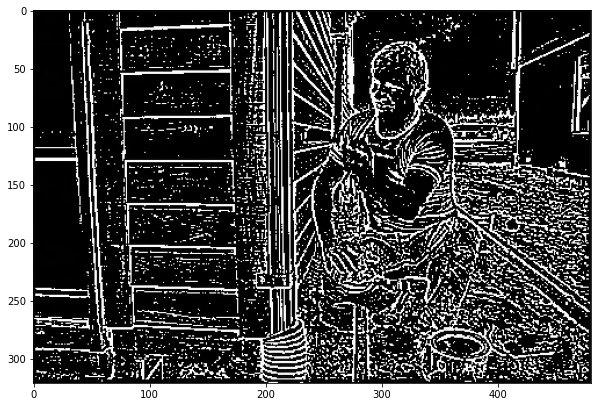


Real SIZE



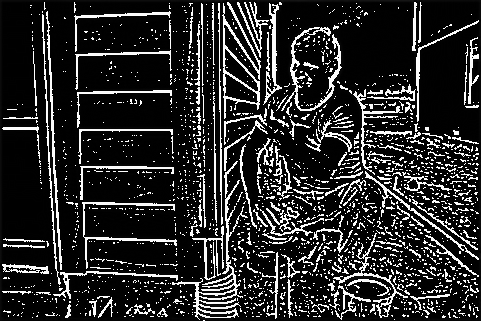


zoomed size



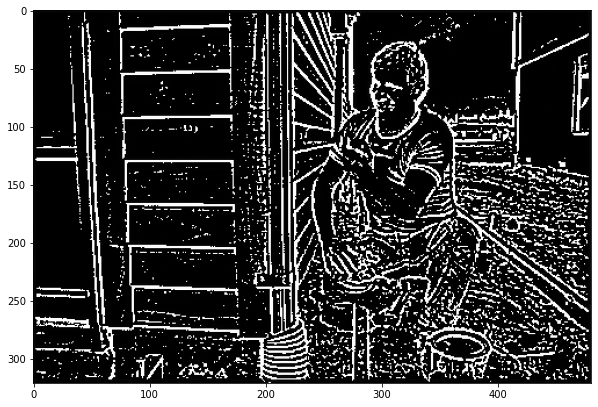


Real SIZE



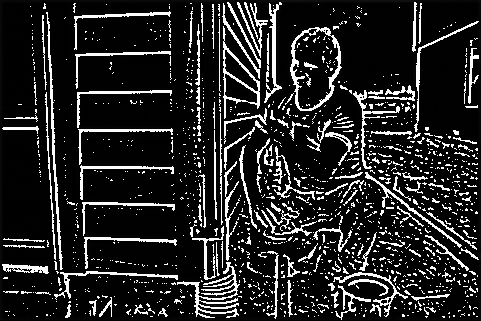


zoomed size



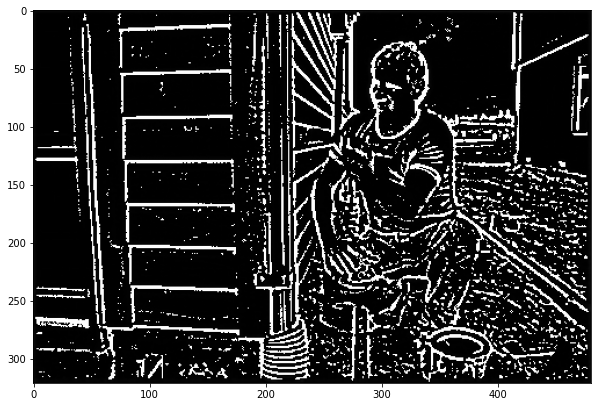

oct num starts  2

Real SIZE



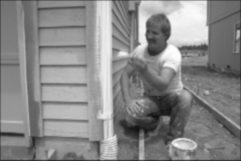


zoomed size



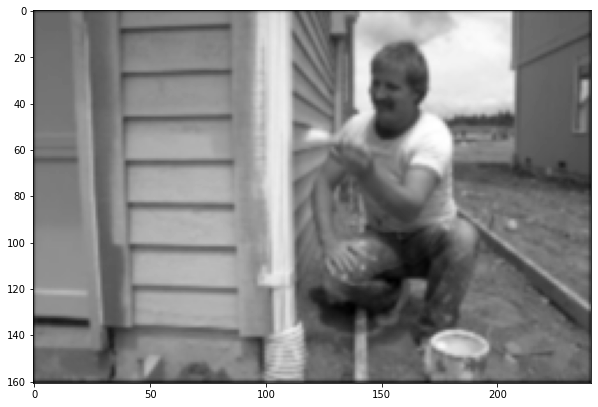


Real SIZE



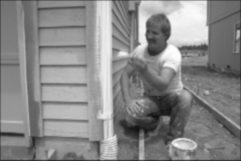


zoomed size



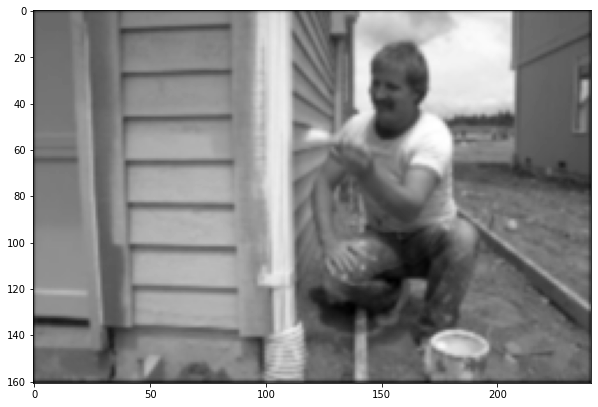


Real SIZE



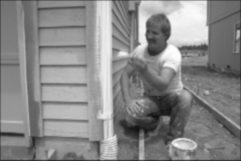


zoomed size



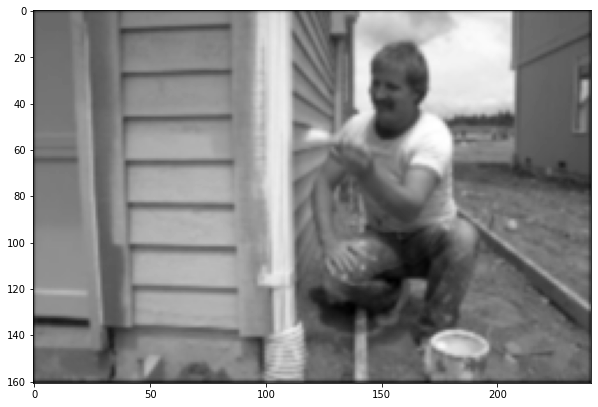


Real SIZE



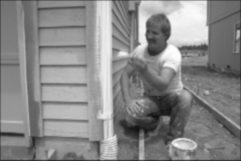


zoomed size



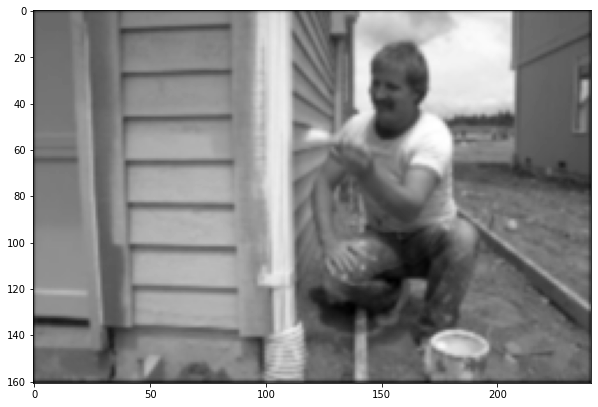


Real SIZE



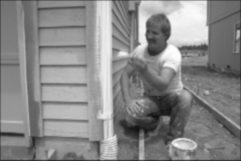


zoomed size



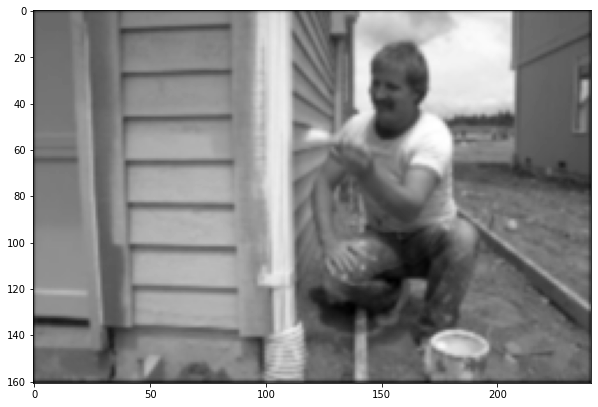


Real SIZE



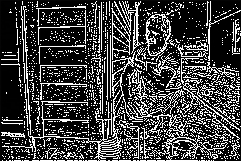


zoomed size



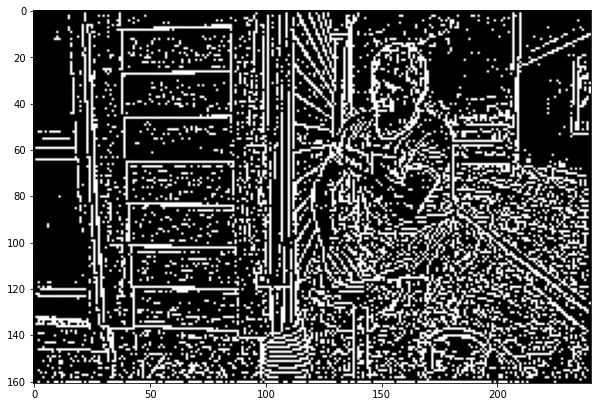


Real SIZE



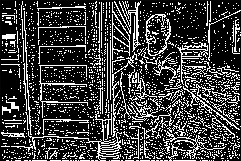


zoomed size



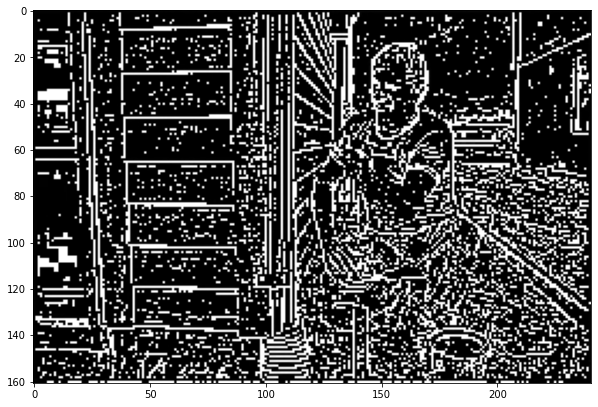


Real SIZE



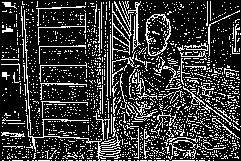


zoomed size



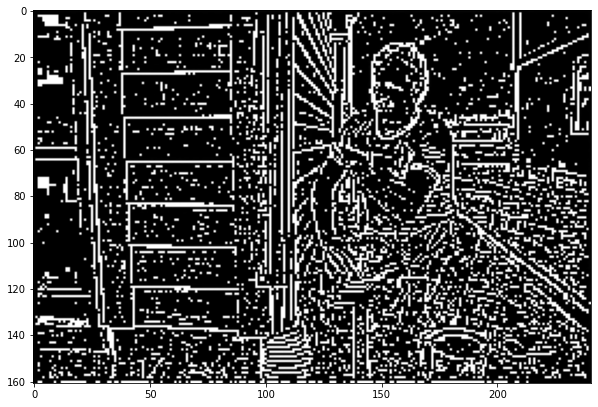


Real SIZE



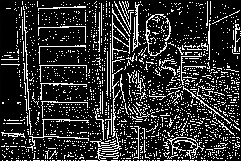


zoomed size



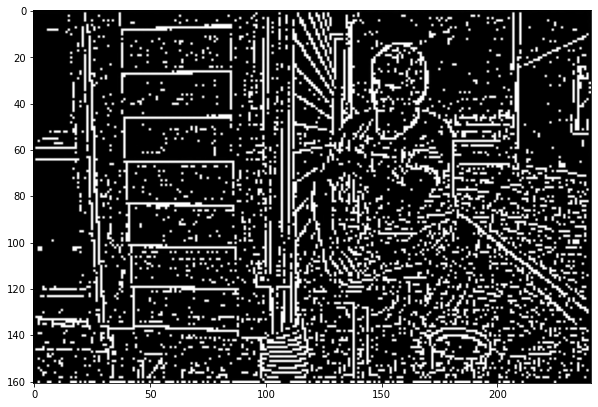

oct num starts  3

Real SIZE



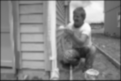


zoomed size



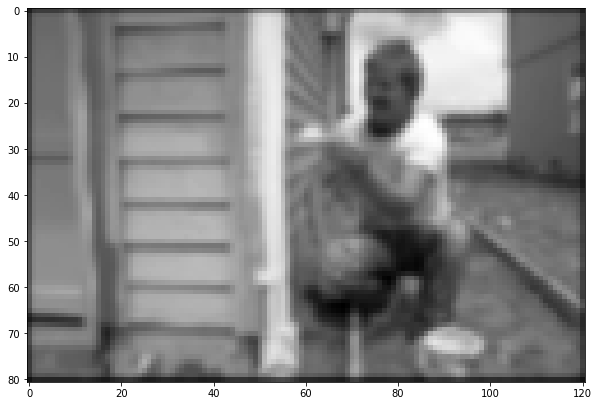


Real SIZE



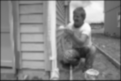


zoomed size



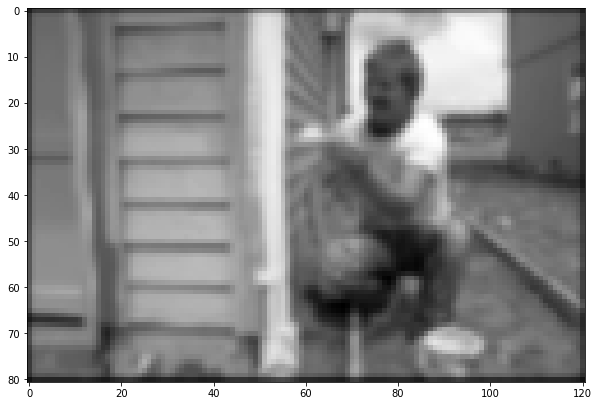


Real SIZE



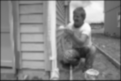


zoomed size



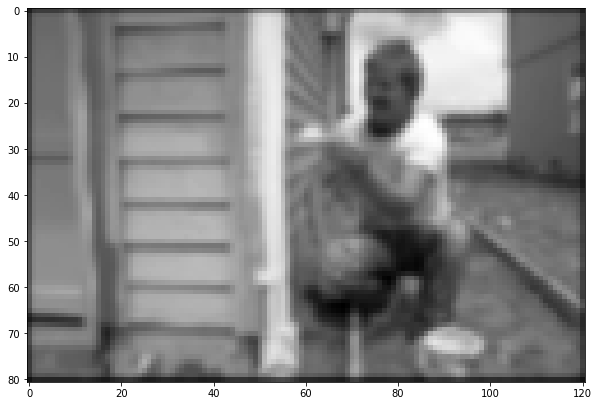


Real SIZE



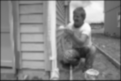


zoomed size



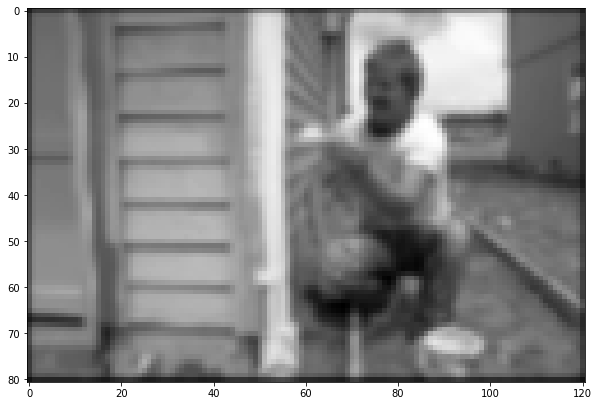


Real SIZE



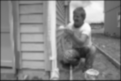


zoomed size



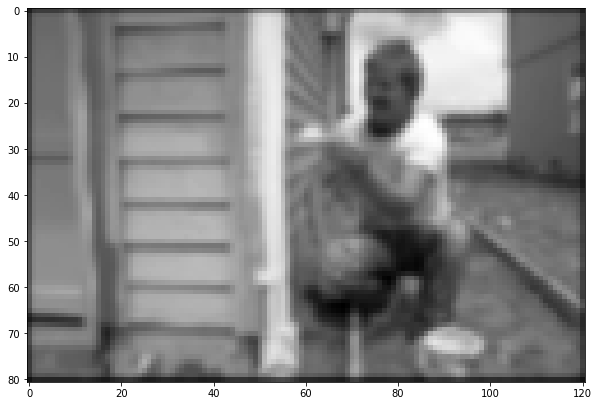


Real SIZE



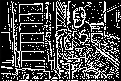


zoomed size



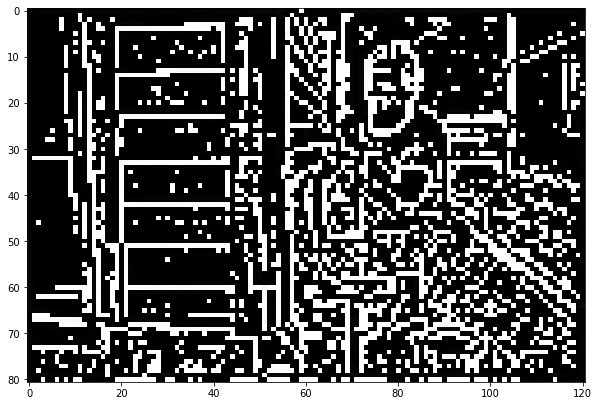


Real SIZE



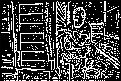


zoomed size



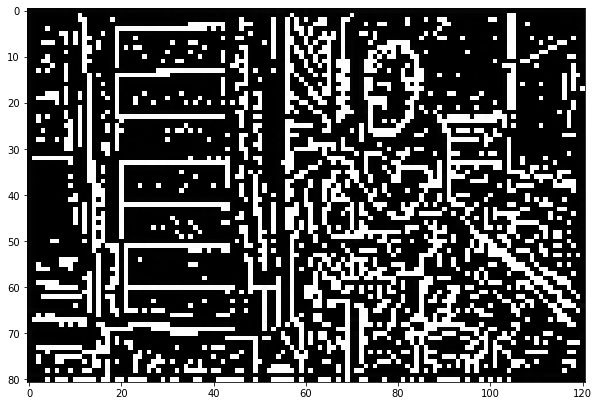


Real SIZE



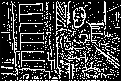


zoomed size



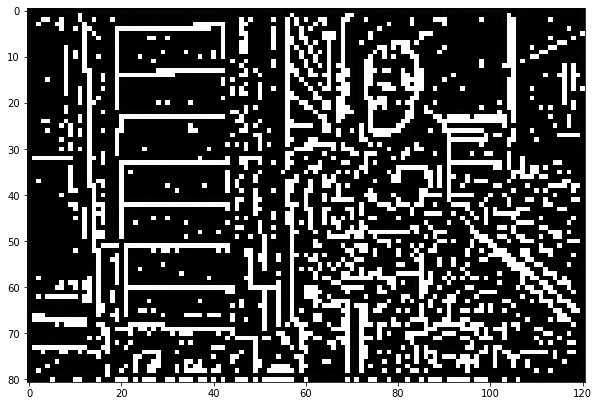


Real SIZE



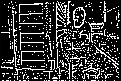


zoomed size



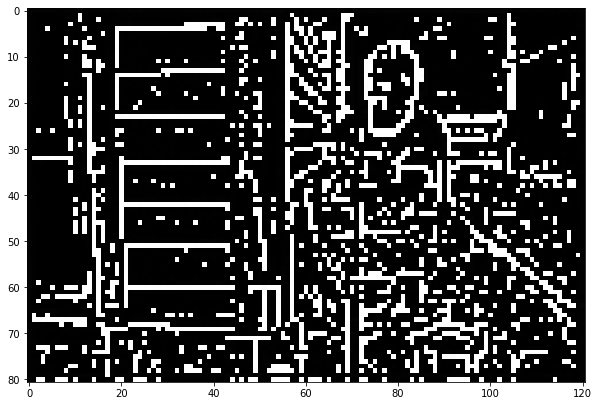

oct num starts  4

Real SIZE



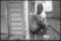


zoomed size



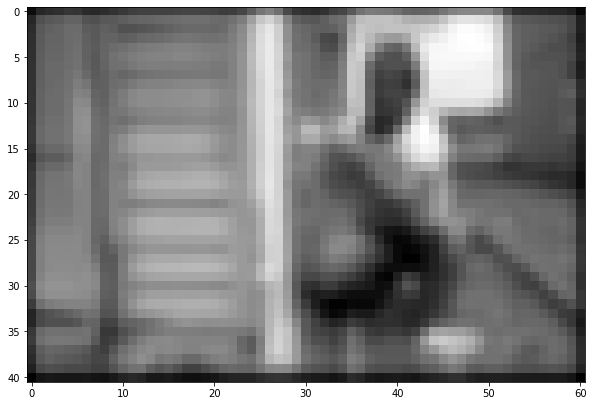


Real SIZE



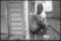


zoomed size



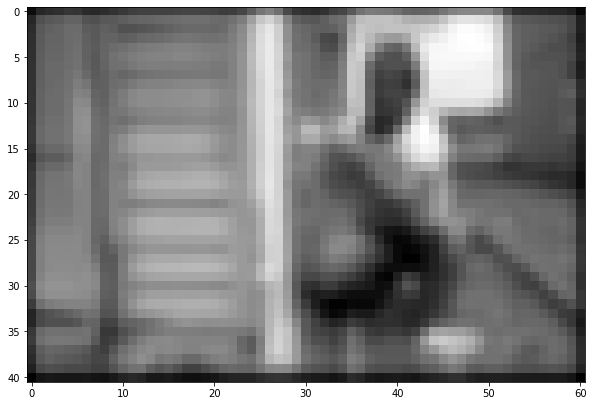


Real SIZE



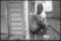


zoomed size



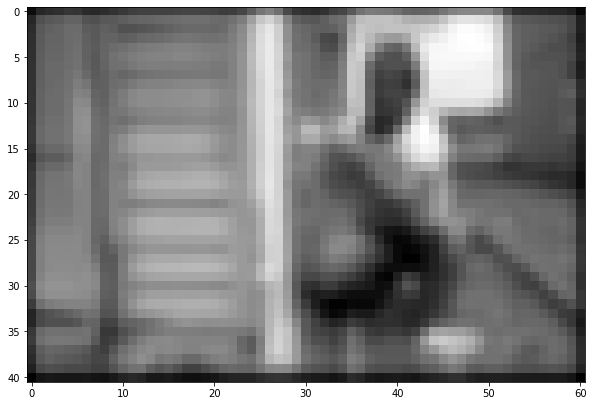


Real SIZE



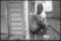


zoomed size



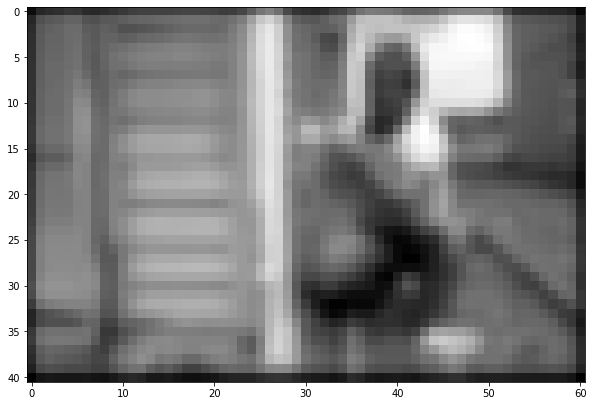


Real SIZE



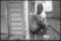


zoomed size



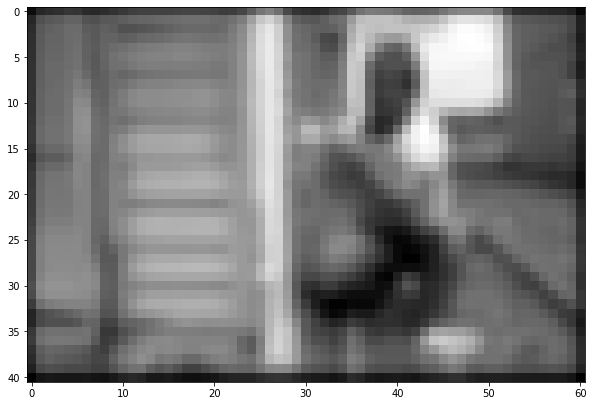


Real SIZE



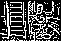


zoomed size



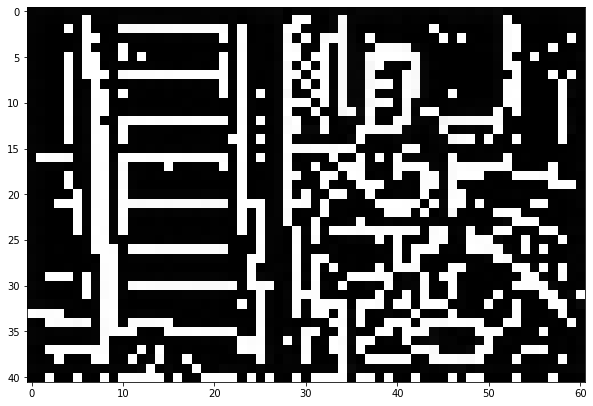


Real SIZE



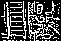


zoomed size



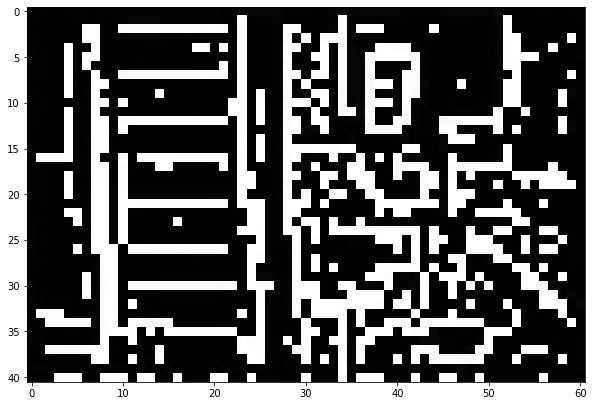


Real SIZE



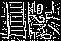


zoomed size



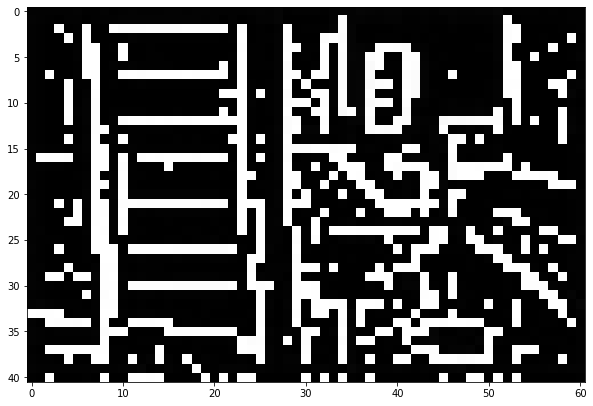


Real SIZE



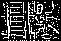


zoomed size



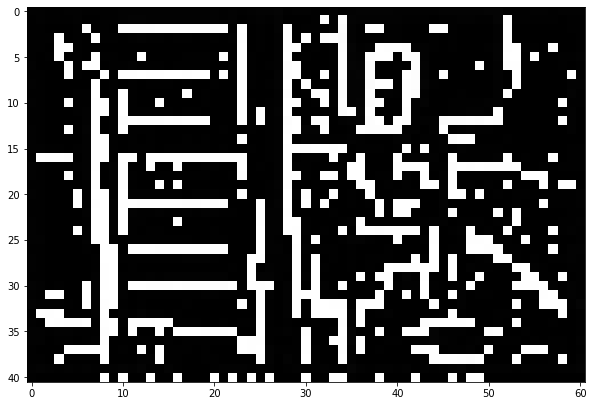

oct num starts  5

Real SIZE




zoomed size



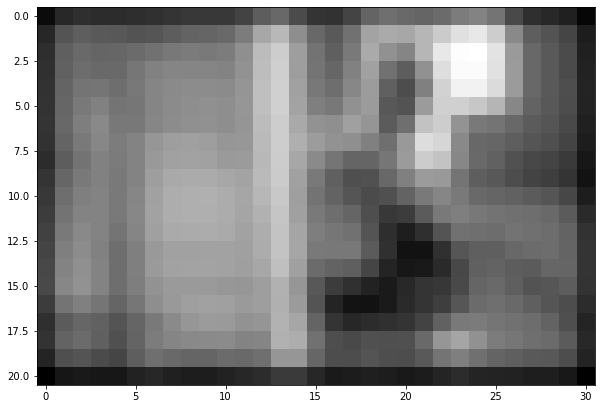


Real SIZE




zoomed size



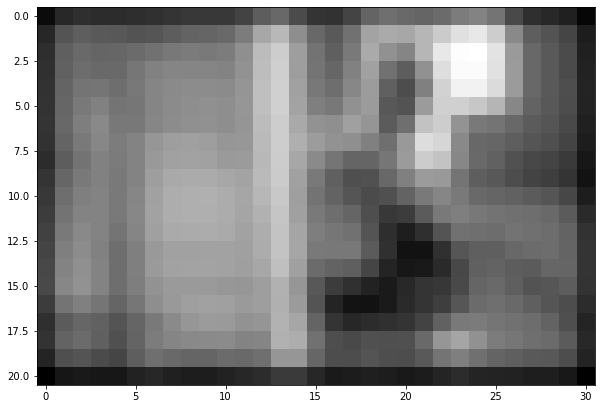


Real SIZE




zoomed size



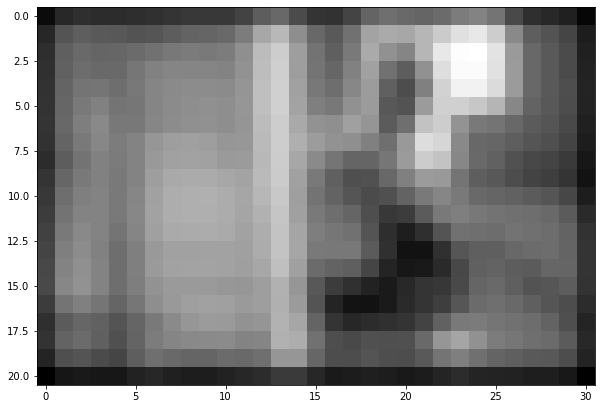


Real SIZE




zoomed size



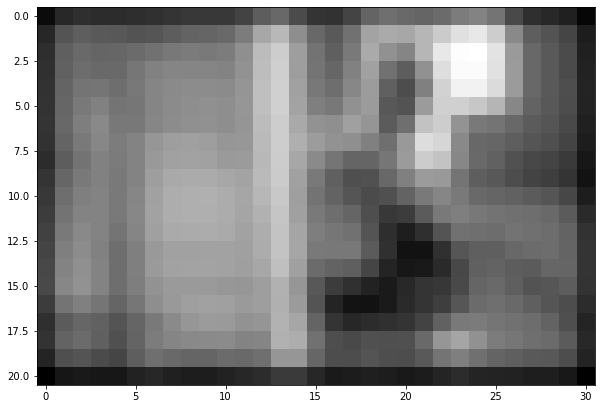


Real SIZE




zoomed size



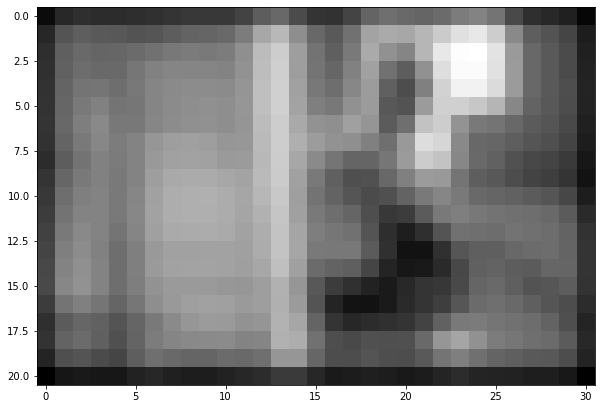


Real SIZE




zoomed size



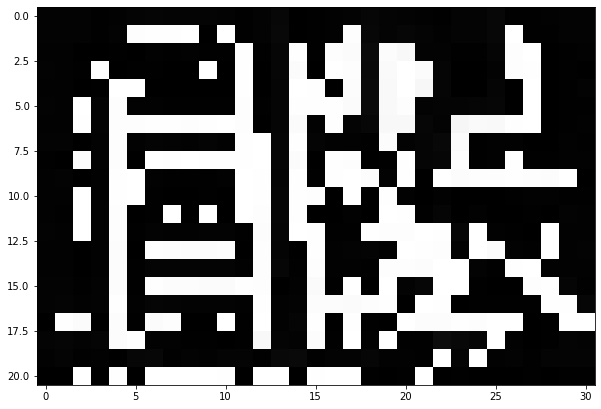


Real SIZE




zoomed size



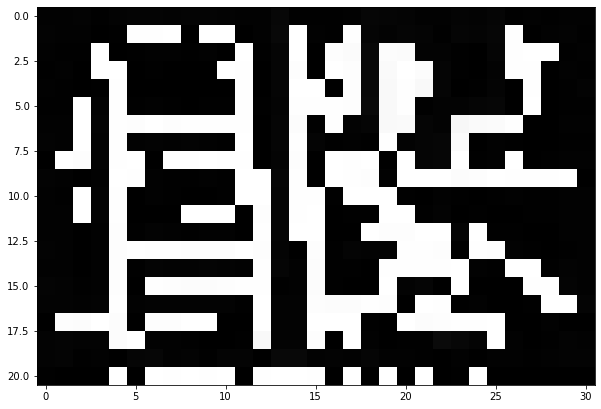


Real SIZE




zoomed size



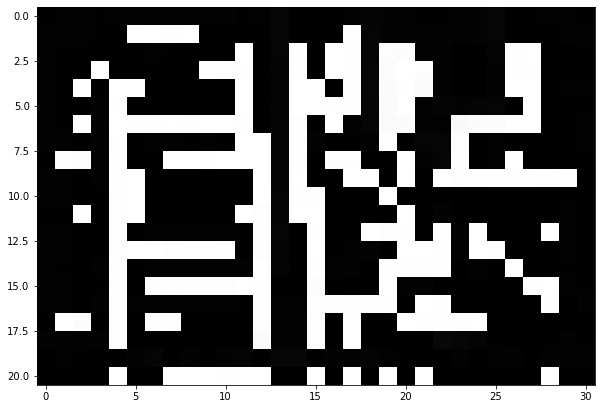


Real SIZE




zoomed size



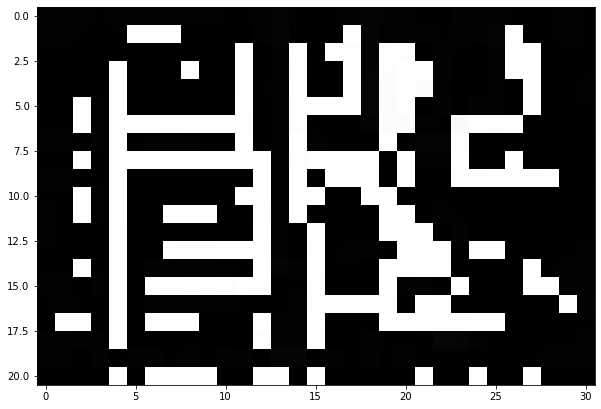

oct num starts  6

Real SIZE




zoomed size



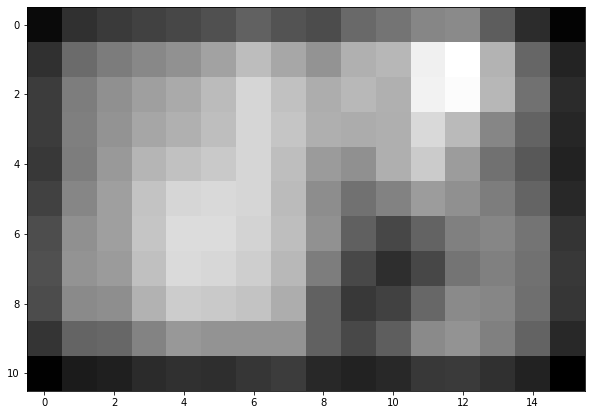


Real SIZE




zoomed size



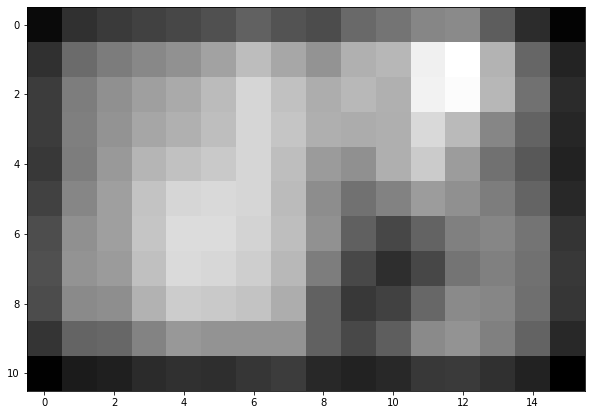


Real SIZE




zoomed size



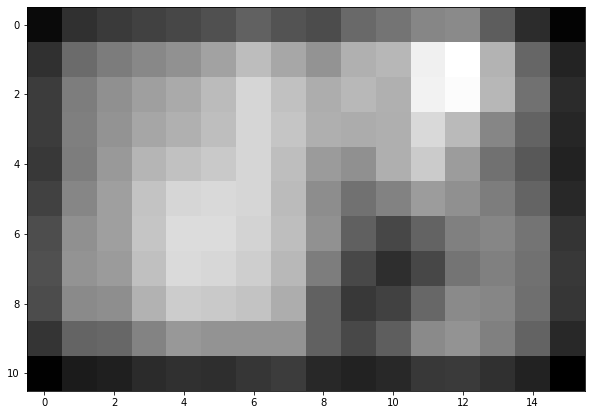


Real SIZE




zoomed size



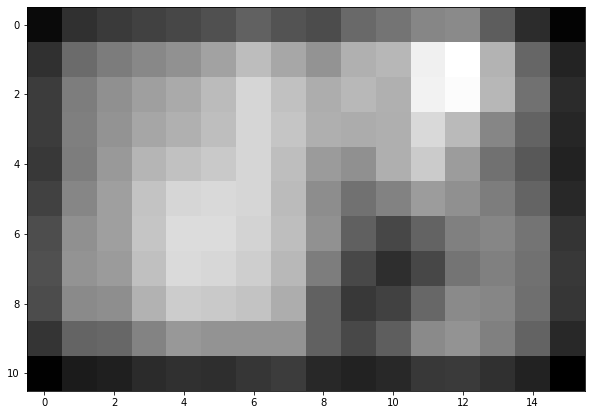


Real SIZE




zoomed size



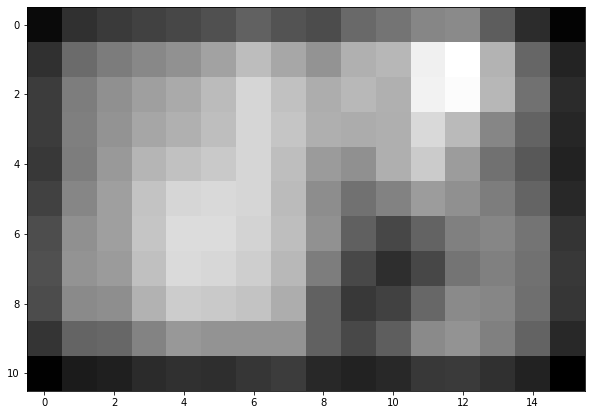


Real SIZE




zoomed size



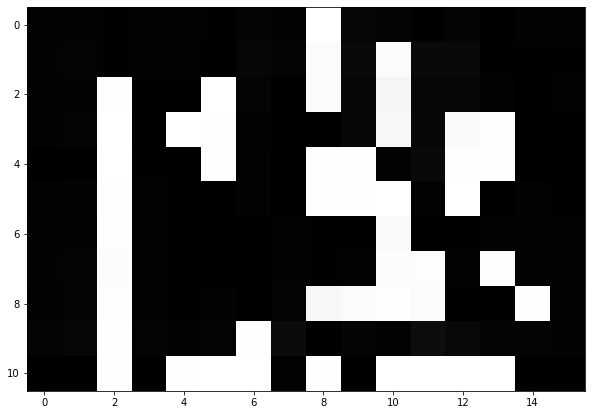


Real SIZE




zoomed size



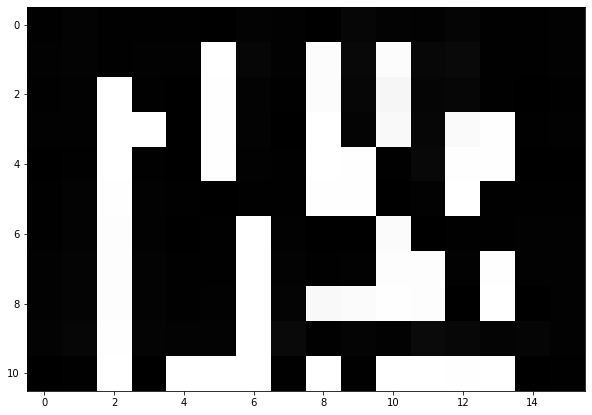


Real SIZE




zoomed size



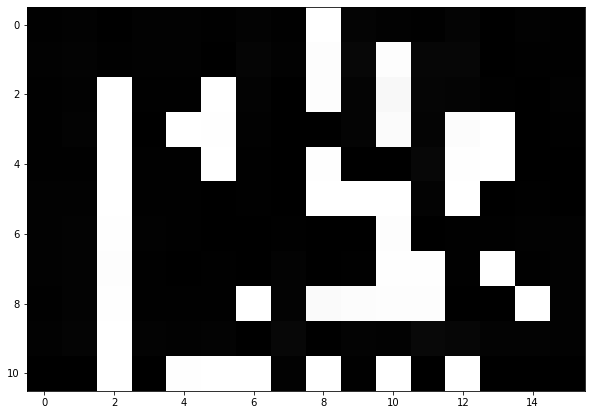


Real SIZE




zoomed size



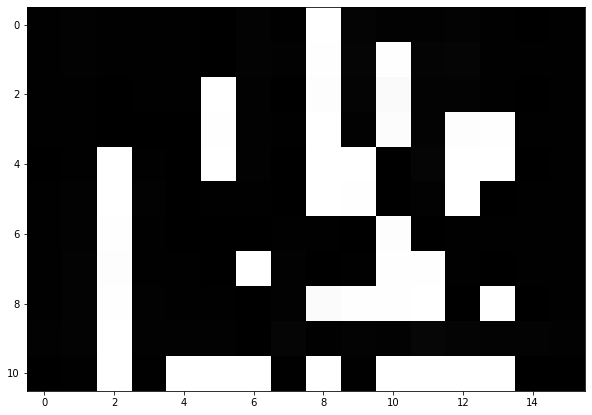

1

In [ ]:
### Libraries
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
import matplotlib.image as pltimg 
import matplotlib.pyplot as plt 
import cv2
from skimage import color
from skimage import io
from google.colab.patches import cv2_imshow
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15
# Generate Gaussian Kernel 
def get_gauss_kernel(size,sigma,k):
    r = 2**(1/5)
    r = r**(k-1)
    sigma = sigma*r
    #print("Sigma = ",sigma)
    size = int(size)
    center=(int)(size/2)
    kernel=np.zeros((int(size),int(size)))
    for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-center)**2+(j-center)**2)
          kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))
    return kernel/np.sum(kernel)
# Convolve a 2d Image
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    #kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image
    #print(image_padded.shape)
    #print("Padded ",image_padded.shape)
    #print("Kernel ",kernel.shape)
    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output
# Resample Image (by a factor of 2)
def resample(image):
  newImage = np.array(image)[::2, 0::2]
  return newImage

def visualiseImage(image):
  #plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
  #plt.imshow(image,cmap='gray')
  #plt.show()
  print("\nReal SIZE\n")
  cv2_imshow(image)
  print("\nzoomed size\n")
  plt.imshow(image, cmap= "gray")
  plt.show()
  
# Generate Difference Of Gaussian Pyramid
def difference_of_gaussian_pyramid(image,sigma,kernel_size):
  prevImage = []
  scaledImage = []
  DOGImage = []
  done = 1

  for octave in range(6):
    print("oct num starts ",octave+1)
    if(image.shape[0]<=10 or image.shape[1]<=10):
      #print("condition met\n")
      #print("OCTAVE NUMBER = ",octave)
      break
    

    for k in range(1,6):

      if(octave > 0 and k == 1):
        
        prev_g = get_gauss_kernel(kernel_size, 1, k)
        #print("Prev g ",prev_g.shape) 
        #print("PREV IMAGE SHAPE ",np.asarray(prevImage[0]).shape)
        new_image = convolve2d(prevImage[0], prev_g)
        new_image = np.array(prevImage[0])
        resample_image = resample(new_image)#
        g = get_gauss_kernel(kernel_size, sigma, k)
        image = convolve2d(resample_image, g)
        scaledImage.append(image)
        prevImage.clear()
      
      else:

        if(octave == 0):

          g = get_gauss_kernel(kernel_size, sigma, k)
          image = convolve2d(image, g)
          scaledImage.append(image)
          #prevImage.append(scaledImage[0])
        
        else:

          g = get_gauss_kernel(kernel_size, sigma, k)
          image = convolve2d(resample_image, g)
          #print("CHECKINGG SHAPE ",image.shape)
          scaledImage.append(image)

    for s in range(4):
      DOGImage.append(np.asarray(scaledImage)[s,:,:]-np.asarray(scaledImage)[s+1,:,:])
      #print("doGshPAE", np.asarray(DOGImage).shape)
      #visualiseImage(np.asarray(scaledImage)[s,:,:])

    for d in range(5):
      visualiseImage(np.asarray(scaledImage)[s,:,:])

    for i in range(4):
      visualiseImage(np.asarray(DOGImage)[i,:,:])
    
    prevImage.append(scaledImage[0])
    scaledImage.clear()
    DOGImage.clear()
    #print("OctAVE ",octave)
  
  return done

img = Image.open('23080.jpg').convert('L') # read Image
#size=(256,256)
#resize_image = img.resize(size)
#resize_image = np.array(resize_image)
kernel_size = 3
sigma = 0.5 
difference_of_gaussian_pyramid(np.asarray(img),sigma,kernel_size)